In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [67]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:

def inspect_df(df):
    print(df.dtypes)
    print('\n')
    for col in df.columns:
        hasNan = df[col].isnull().values.any()
        print(f'Does {col} have NaN values -> ', hasNan)

inspect_df(df)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Does PassengerId have NaN values ->  False
Does Survived have NaN values ->  False
Does Pclass have NaN values ->  False
Does Name have NaN values ->  False
Does Sex have NaN values ->  False
Does Age have NaN values ->  True
Does SibSp have NaN values ->  False
Does Parch have NaN values ->  False
Does Ticket have NaN values ->  False
Does Fare have NaN values ->  False
Does Cabin have NaN values ->  True
Does Embarked have NaN values ->  True


In [69]:
def nan_count(df):
    for col in df.columns:
        hasNan = df[col].isnull().values.any()
        if hasNan:
            nan_count = df[col].isna().sum()
            nan_perc = nan_count/len(df['Cabin'])
            print(f'{col} has: {nan_perc*100} % of NaN values')

nan_count(df)

Age has: 19.865319865319865 % of NaN values
Cabin has: 77.10437710437711 % of NaN values
Embarked has: 0.22446689113355783 % of NaN values


In [73]:
def parse_Name(df):
    titles = []
    for i in range(len(df)):
        try:
            title = df.loc[i, 'Name'].split(', ')[1].split('.')[0]
        
        except Exception:
            print(df.loc[i, 'Name'])
            title = 'Mr.'
        titles.append(title)

    df['Title'] = titles
    df['Title'] = df['Title'].astype('category')
    return df

def process_df(df):
    try:
        y = df['Survived']
        df = df.drop(columns=['Survived'])
    except Exception:
        y = None
        
    df = parse_Name(df)
    df = df.drop(columns=['PassengerId', 'Cabin', 'Ticket', 'Name'])
    df['Pclass'] = df['Pclass'].astype('category')
    df['Sex'] = df['Sex'].astype('category')
    df['Embarked'] = df['Embarked'].astype('category')
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])

    # Normalize all numerical features
    for col, dtype in zip(df.columns, df.dtypes):
        if dtype != 'category':
            df[col]=(df[col]-df[col].mean())/df[col].std()
        
        else:
            print('\n')
            print(df[col].value_counts())
            print(len(df[col].value_counts()))

    X = df
    return X, y

X, y = process_df(df)



Pclass
3    491
1    216
2    184
Name: count, dtype: int64
3


Sex
male      577
female    314
Name: count, dtype: int64
2


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
3


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: count, dtype: int64
17


In [74]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X = encoder.fit_transform(X).toarray()

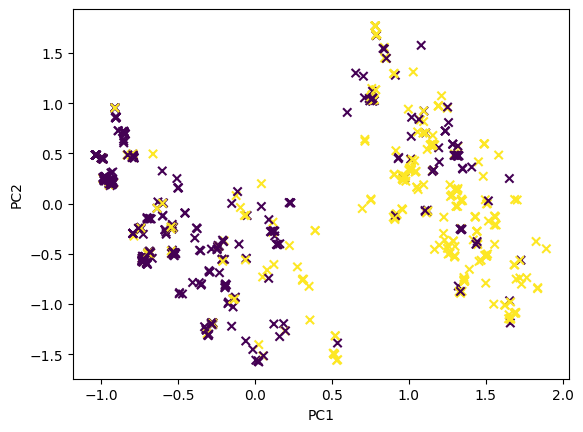

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

dim_reduction = PCA(n_components=2)
X_reduced = dim_reduction.fit_transform(X, y)

ax = plt.figure().add_subplot()
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y, marker='x')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
X_train_transformed = StandardScaler().fit_transform(X_train)
# X_train_transformed = X_train

(623, 376) (268, 376)


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
]

parameters = [
    {'n_neighbors':[1, 5, 10]},
    {'kernel':('linear', 'rbf'), 'C':[0.025, 0.1, 1, 10]},
    {'max_depth':[5, 10], 'n_estimators':[10, 15, 50]},
    {'n_estimators': [10, 15], 'learning_rate':[0.1, 1]}
]

for model, params in zip(classifiers, parameters):
    clf = GridSearchCV(model, params, cv=10)
    clf.fit(X_train_transformed, y_train)
    print(type(model).__name__, 'has best params:', clf.best_params_, 'with a score of', clf.best_score_*100, '%')

KNeighborsClassifier has best params: {'n_neighbors': 1} with a score of 68.55862775217615 %
SVC has best params: {'C': 0.025, 'kernel': 'linear'} with a score of 81.38504864311317 %
RandomForestClassifier has best params: {'max_depth': 10, 'n_estimators': 10} with a score of 81.86635944700461 %
AdaBoostClassifier has best params: {'learning_rate': 0.1, 'n_estimators': 15} with a score of 79.47004608294932 %


In [78]:
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Confusion Matrix: ')
    print(confusion_matrix(y_pred=y_pred, y_true=y_test))

    print('\nAccuracy: ')
    print(accuracy_score(y_pred=y_pred, y_true=y_test) * 100)

    print('\nPrecision: ')
    print(precision_score(y_pred=y_pred, y_true=y_test) * 100)

    print('\nRecall: ')
    print(recall_score(y_pred=y_pred, y_true=y_test) * 100)

    print('\nF1 Score: ')
    print(f1_score(y_pred=y_pred, y_true=y_test) * 100)

In [79]:
model = SVC(kernel='linear', C=0.025)
model.fit(X_train_transformed, y_train)
evaluate(model, X_test, y_test)

Confusion Matrix: 
[[162   6]
 [ 48  52]]

Accuracy: 
79.8507462686567

Precision: 
89.65517241379311

Recall: 
52.0

F1 Score: 
65.82278481012658


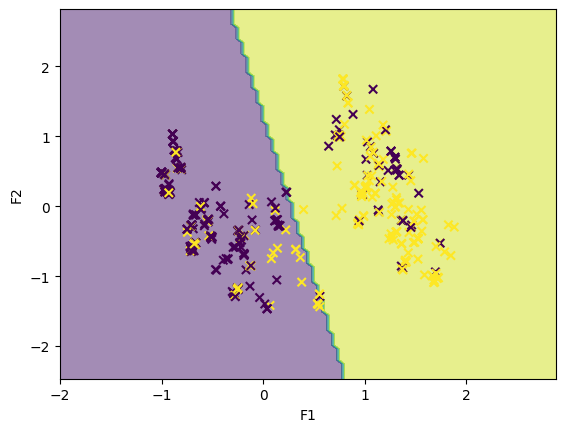

Confusion Matrix: 
[[140  28]
 [ 28  72]]

Accuracy: 
79.1044776119403

Precision: 
72.0

Recall: 
72.0

F1 Score: 
72.0


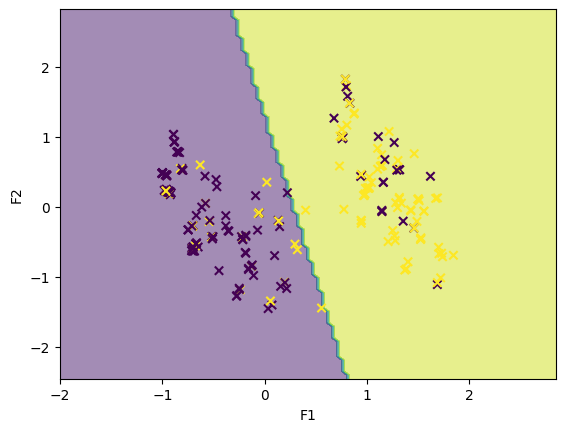

In [80]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_results(model, X, y):

    if model:
        disp = DecisionBoundaryDisplay.from_estimator(model, X, 
                                                response_method="predict", 
                                                xlabel='F1', 
                                                ylabel='F2',
                                                alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, marker='x')
    plt.show()

dim_reduction = PCA(n_components=2)
X_train_reduced = dim_reduction.fit_transform(X_train, y_train)

model = SVC(kernel='linear', C=0.025)
model.fit(X_train_reduced, y_train)
plot_results(model, X_train_reduced, y_train)

X_test_reduced = dim_reduction.transform(X_test)
evaluate(model, X_test_reduced, y_test)
plot_results(model, X_test_reduced, y_test)